# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time


# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,
 
}




common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

# 'delta for galaxies' : "200c",
# 'delta for matter density' : "200c",
# 'delta for electron density':"200c",    

'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',

'hm_consistency' : 1,
'x_outSZ': 4.,
'truncate_gas_pressure_wrt_rvir':1,
}

Using PATH_TO_COSMOPOWER_ORGANIZATION: jk/cosmopower-organization
Directory jk/cosmopower-organization does not exist. Falling back to default path.
Defaulting to: /Users/boris/cosmopower-organization
Found cosmopower-organization directory with all repositories at: /Users/boris/cosmopower-organization
PATH_TO_COSMOPOWER_ORGANIZATION is not correctly set. Setting it now...
PATH_TO_COSMOPOWER_ORGANIZATION is set to /Users/boris/cosmopower-organization
Repository downloaded successfully.
Selected directories from class-sz/ have been copied to /Users/boris/cosmopower-organization.


In [2]:
%%time
import classy_sz
classy_sz.__file__


CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 10 µs


'/Users/boris/Desktop/venv_test/test_nop/lib/python3.9/site-packages/classy_sz.cpython-39-darwin.so'

# compute class_sz slow

In [3]:
1

1

In [4]:
%%time

M = Class()

# M.set(common_params)
# M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile':'B12',

"ell_min" : 10,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
'P0_B12' : 18.1,
    
'n_l_pressure_profile' :80, # this is l/ls
'n_m_pressure_profile' :30, # default: 100, decrease for faster
'n_z_pressure_profile' :30, # default: 100, decrease for faster

'l_min_gas_pressure_profile' : 1e-5, # l/ls hence no need for very extreme values...
'l_max_gas_pressure_profile' : 1e5, 

# 'k_min_gas_pressure_profile' : 1e-3, # l/ls hence no need for very extreme values...
# 'k_max_gas_pressure_profile' : 1e2, 
    
'k_min_samp_fftw' : 1e-3,
'k_max_samp_fftw' : 1e3,
'N_samp_fftw' : 1024,
    
    
'hm_consistency' : 0,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-5,
'x_max_gas_pressure_fftw' : 1e5,
    
    
'ndim_masses' : 500,
'ndim_redshifts' :100,

})
M.compute_class_szfast()

CPU times: user 15.9 s, sys: 1.3 s, total: 17.2 s
Wall time: 2.04 s


In [5]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
cl_yy_2h = np.asarray(M.cl_sz()['2h'])

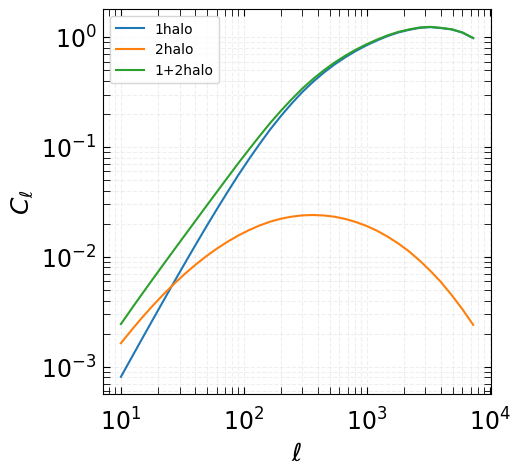

In [6]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

## secondary computation without varying cosmo

In [7]:
%%time
P0_B12p = 8.1
class_sz_params_to_update={
    'P0_B12' : P0_B12p
}
M.compute_class_sz(class_sz_params_to_update)

CPU times: user 2.42 s, sys: 28.2 ms, total: 2.45 s
Wall time: 460 ms


In [8]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
cl_yy_2h = np.asarray(M.cl_sz()['2h'])

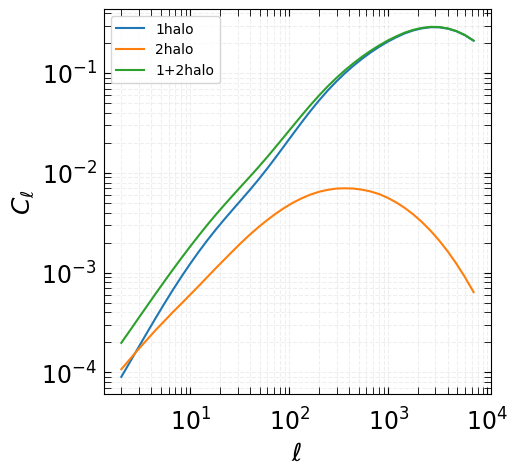

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

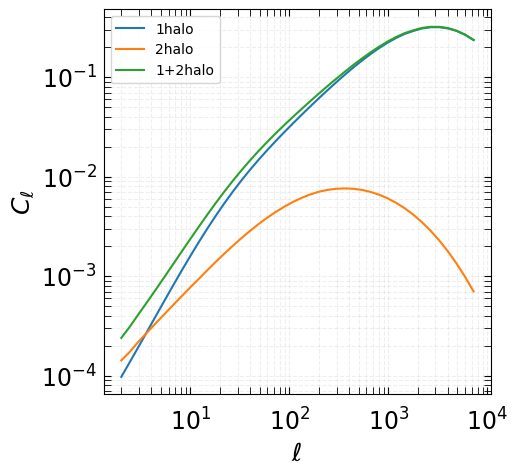

In [11]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

# compute class_szfast

In [12]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile':'B12',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
'P0_B12' : 18.1,
    

'n_m_pressure_profile' :30, # default: 100, decrease for faster
'n_z_pressure_profile' :30, # default: 100, decrease for faster


    
    
'hm_consistency' : 1,
    

'use_fft_for_profiles_transform' : 1,

'N_samp_fftw' : 512,
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e3,
    
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :50,

# # testing with 3 massive neutrinos
# 'N_ncdm': 3,
# 'N_ur': 0.00641,
# 'm_ncdm': '0.06,0.06,0.06', 
})
M.compute_class_szfast()

CPU times: user 1.86 s, sys: 107 ms, total: 1.97 s
Wall time: 461 ms


In [13]:
M.get_current_derived_parameters(['Neff'])

{'Neff': 3.0459999999999994}

In [14]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
cl_yy_2h = np.asarray(M.cl_sz()['2h'])

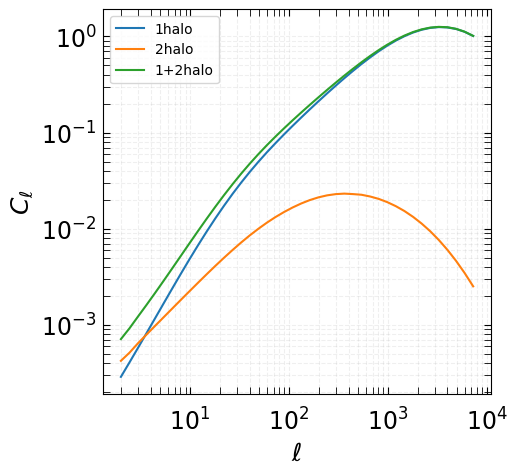

In [15]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

## secondary computation without varying cosmo

In [19]:
%%time
P0_B12p = 8.1
class_sz_params_to_update={
    'P0_B12' : P0_B12p,
    'beta_B12': 1.35,
}
M.compute_class_sz(class_sz_params_to_update)

CPU times: user 1.01 s, sys: 3.45 ms, total: 1.01 s
Wall time: 171 ms


In [20]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
cl_yy_2h = np.asarray(M.cl_sz()['2h'])

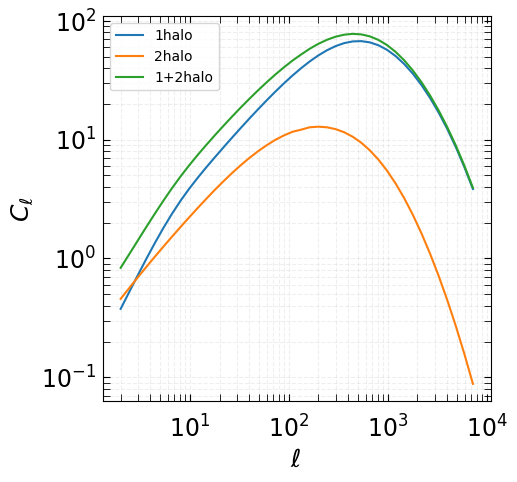

In [21]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

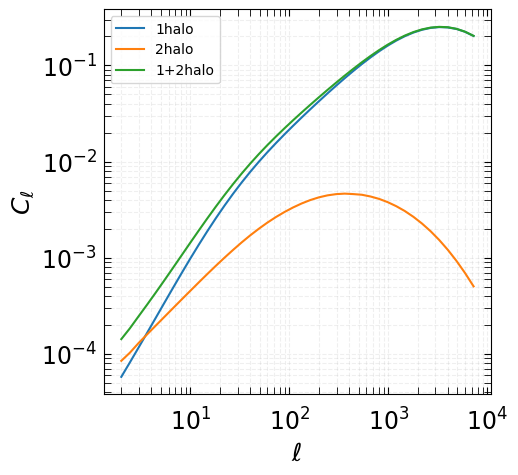

In [27]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

# comparison between fft and gsl integration for the pressure profile transform

## FFTLog

In [1]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile':'B12',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
'P0_B12' : 18.1,
    
# 'n_k_pressure_profile' :800, # this is l/ls -->controled by fft
'n_m_pressure_profile' :100, # default: 100, decrease for faster
'n_z_pressure_profile' :100, # default: 100, decrease for faster

# 'k_min_gas_pressure_profile' : 1e-3, # l/ls hence no need for very extreme values...
# 'k_max_gas_pressure_profile' : 1e2, 

    

'N_samp_fftw' : 2048,
    
    
'hm_consistency' : 1,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-5,
'x_max_gas_pressure_fftw' : 1e2,
    
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :80,

# # testing with 3 massive neutrinos
# 'N_ncdm': 3,
# 'N_ur': 0.00641,
# 'm_ncdm': '0.06,0.06,0.06', 
})
M.compute_class_szfast()

NameError: name 'Class' is not defined

In [25]:
l_fft = np.asarray(M.cl_sz()['ell'])
cl_yy_1h_fft = np.asarray(M.cl_sz()['1h'])
cl_yy_2h_fft = np.asarray(M.cl_sz()['2h'])

[]

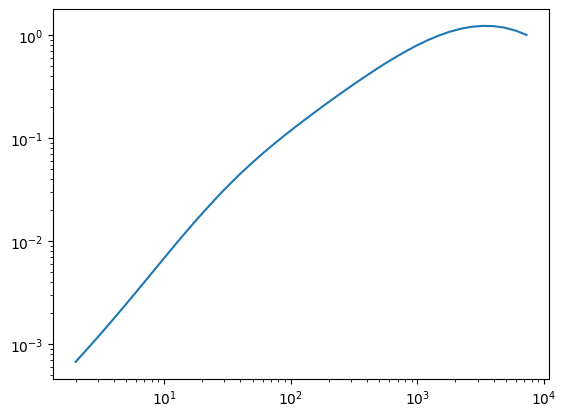

In [26]:
plt.plot(l_fft,cl_yy_1h_fft+cl_yy_2h_fft)
plt.loglog()

## GSL

In [ ]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile': 'B12',# default
# 'pressure profile':'Custom. GNFW',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
'P0_B12' : 18.1,
    
'n_k_pressure_profile' :200, # this is l/ls
'n_m_pressure_profile' :30, # default: 100, decrease for faster
'n_z_pressure_profile' :30, # default: 100, decrease for faster

'k_min_gas_pressure_profile' : 1e-3, # l/ls hence no need for very extreme values...
'k_max_gas_pressure_profile' : 1e2, 
    
'hm_consistency' : 1,
    

'use_fft_for_profiles_transform' : 0,

    
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :80,

# # testing with 3 massive neutrinos
# 'N_ncdm': 3,
# 'N_ur': 0.00641,
# 'm_ncdm': '0.06,0.06,0.06', 
})
M.compute()

In [19]:
l_gsl = np.asarray(M.cl_sz()['ell'])
cl_yy_1h_gsl = np.asarray(M.cl_sz()['1h'])
cl_yy_2h_gsl = np.asarray(M.cl_sz()['2h'])

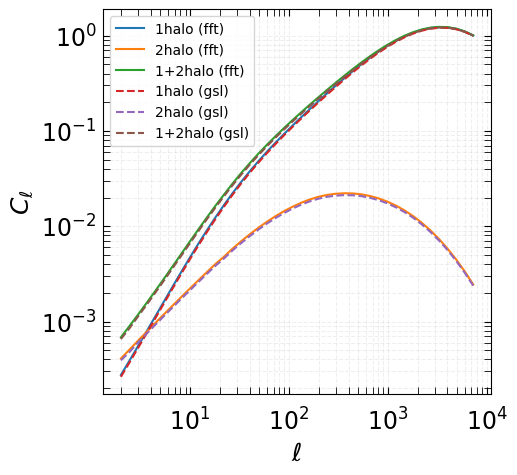

In [20]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l_fft,cl_yy_1h_fft,label='1halo (fft)')
ax.plot(l_fft,cl_yy_2h_fft,label='2halo (fft)')
ax.plot(l_fft,cl_yy_2h_fft+cl_yy_1h_fft,label='1+2halo (fft)')


ax.plot(l_gsl,cl_yy_1h_gsl,label='1halo (gsl)',ls='--')
ax.plot(l_gsl,cl_yy_2h_gsl,label='2halo (gsl)',ls='--')
ax.plot(l_gsl,cl_yy_2h_gsl+cl_yy_1h_gsl,label='1+2halo (gsl)',ls='--')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

# Custom GNFW profile

In [38]:
%%time
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time
from classy_sz import Class
# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,
 
}




common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

# 'delta for galaxies' : "200c",
# 'delta for matter density' : "200c",
# 'delta for electron density':"200c",    

'mass function' : 'M500',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',

'hm_consistency' : 1,
'x_outSZ': 15.,
# 'truncate_gas_pressure_wrt_rvir':0,
}

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'tSZ_1h,tSZ_2h',

'pressure profile':'B12',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
    
# 'P0_B12' : 18.1,
    
# 'n_k_pressure_profile' :8000, # this is l/ls -->controled by fft
'n_m_pressure_profile' :200, 
'n_z_pressure_profile' :200, 

# 'k_min_gas_pressure_profile' : 1e-3, # l/ls hence no need for very extreme values...
# 'k_max_gas_pressure_profile' : 1e2, 

    

'N_samp_fftw' : 2048,
    
    
'hm_consistency' : 1,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e4,
    
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :100,

# # testing with 3 massive neutrinos
# 'N_ncdm': 3,
# 'N_ur': 0.00641,
# 'm_ncdm': '0.06,0.06,0.06', 
})
M.compute_class_szfast()

CPU times: user 16.8 s, sys: 340 ms, total: 17.2 s
Wall time: 2.36 s


In [39]:
import numpy as np
l_fft = np.asarray(M.cl_sz()['ell'])
cl_yy_1h_fft = np.asarray(M.cl_sz()['1h'])
cl_yy_2h_fft = np.asarray(M.cl_sz()['2h'])

[]

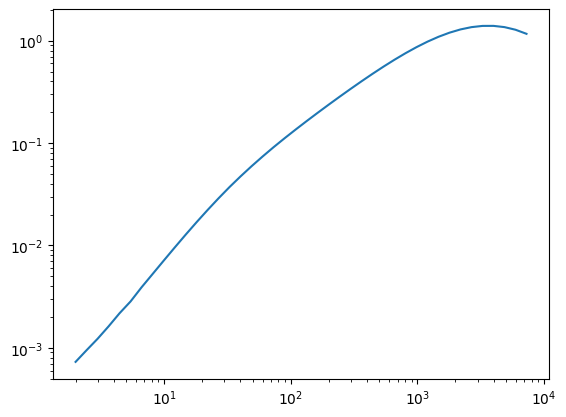

In [40]:
plt.plot(l_fft,cl_yy_1h_fft+cl_yy_2h_fft)
plt.loglog()